In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import helper as hp
from statsmodels.regression import linear_model
import scipy.stats as stats

plt.style.use('ggplot')

In [82]:
pathways = {'Denver, CO': ('~/Desktop/capstone/data/Denver_1940_2010.csv', ''),
            'Seattle, WA': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'SEATTLE TACOMA AIRPORT, WA US'),
#            'North Bend, WA': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'CEDAR LAKE, WA US'),
            'Boston, MA': ('~/Desktop/capstone/data/Boston_1936_corr.csv', ''),
#             'JP': ('~/Desktop/capstone/data/JP.csv', ''),
            'Baton Rouge, LA': ('~/Desktop/capstone/data/Baton_Rouge.csv','')}

In [83]:
####  Load all
start_date = datetime(1950,1,1)
end_date = datetime(2019,12,31)
Location = dict()
for name, path in pathways.items():
    Location[name] = hp.GHCN_Loc(*path)
    Location[name].set_range(start_date, end_date)
    Location[name].process()
    Location[name].create_aggregate_df()

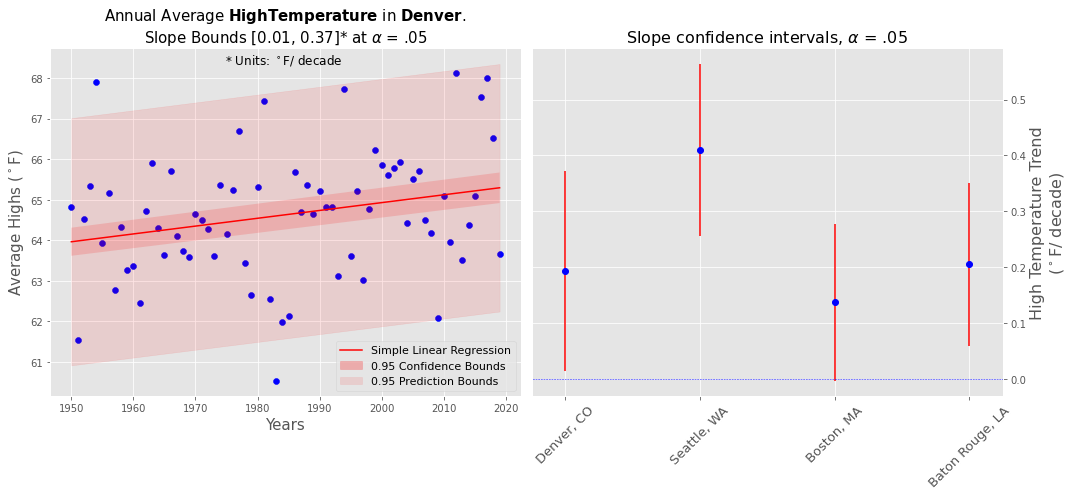

In [193]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

Loc = Location['Denver, CO']
CI = Loc.stats(axs[0], 'TMAX_avg', 0.05)

axs[0].legend(fontsize=11, loc='lower right')
leg = axs[0].get_legend()
leg.legendHandles[1].set_color([1, 0, 0, 0.25])

axs[0].set_ylabel(hp.ylabel_dict['TMAX_avg'], fontsize = 15)
axs[0].set_xlabel('Years', fontsize = 15)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
axs[0].set_title(r"""Annual Average ${\bfHigh Temperature}$ in ${\bfDenver}$.
"""             + title_text, fontsize = 15)
axs[0].text(0.37, 1.45, r'* Units: $^\circ$F/ decade', transform=ax.transAxes, fontsize=12)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);


#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'TMAX_avg'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
axs[1].set_ylabel(r'''High Temperature Trend
($^\circ$F/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
# plt.grid(False)
plt.tight_layout()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

plt.tight_layout()
plt.savefig('Denver_TMAX_annual_both.png', edgecolor = 'b')

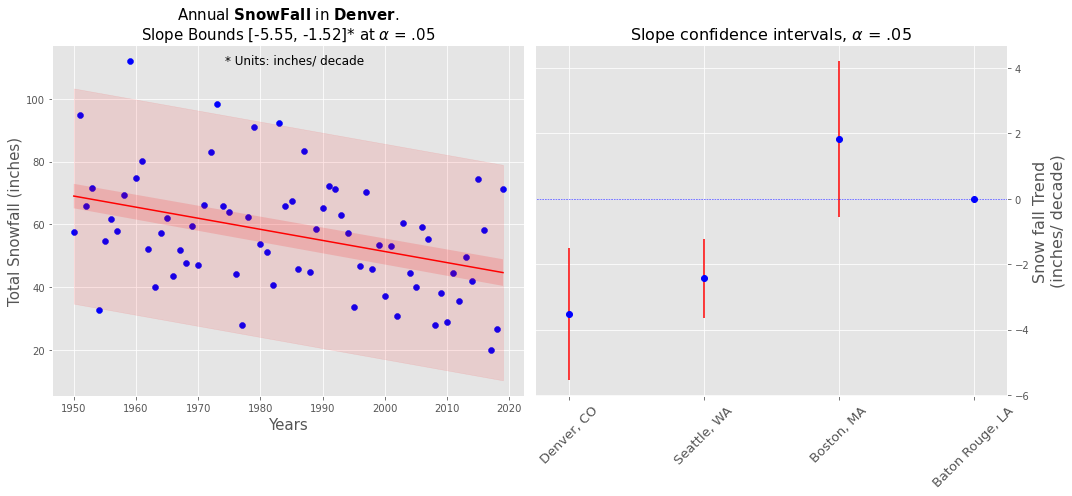

In [182]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

Loc = Location['Denver, CO']
CI = Loc.stats(axs[0], 'SNOW_sum', 0.05)

# axs[0].legend(fontsize=11, loc='lower right')
# leg = axs[0].get_legend()
# leg.legendHandles[1].set_color([1, 0, 0, 0.25])

axs[0].set_ylabel(hp.ylabel_dict['SNOW_sum'], fontsize = 15)
axs[0].set_xlabel('Years', fontsize = 15)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
axs[0].set_title(r"""Annual ${\bfSnow Fall}$ in ${\bfDenver}$.
"""             + title_text, fontsize = 15)
axs[0].text(0.37, 1.45, r'* Units: inches/ decade', transform=ax.transAxes, fontsize=12)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);


#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'SNOW_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
axs[1].set_ylabel(r'''Snow fall Trend
(inches/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

plt.tight_layout()
plt.savefig('Denver_SNOW_annual_both.png', edgecolor = 'b')

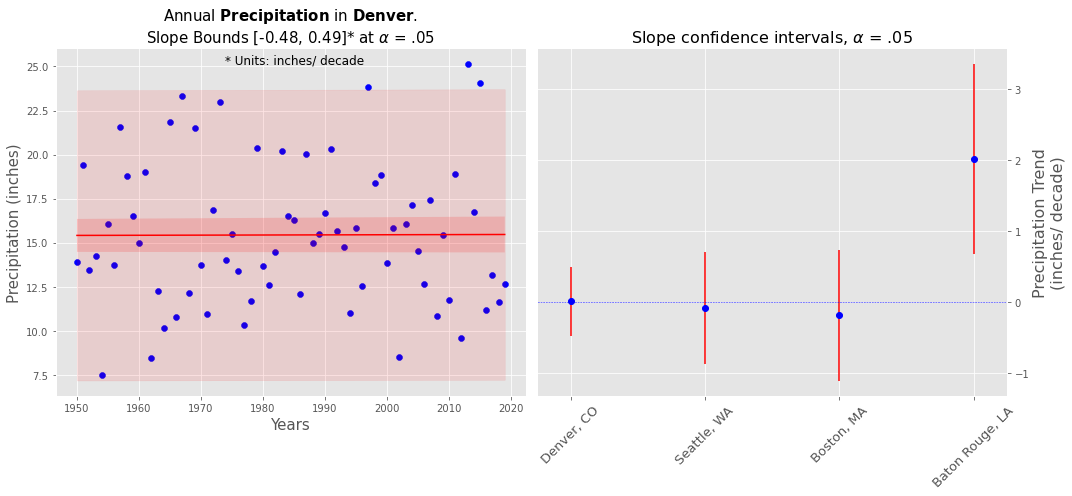

In [183]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

Loc = Location['Denver, CO']
CI = Loc.stats(axs[0], 'PRCP_sum', 0.05)

axs[0].set_ylabel(hp.ylabel_dict['PRCP_sum'], fontsize = 15)
axs[0].set_xlabel('Years', fontsize = 15)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
axs[0].set_title(r"""Annual ${\bfPrecipitation}$ in ${\bfDenver}$.
"""             + title_text, fontsize = 15)
axs[0].text(0.37, 1.45, r'* Units: inches/ decade', transform=ax.transAxes, fontsize=12)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);


#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'PRCP_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

axs[1].errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
axs[1].set_ylabel(r'''Precipitation Trend
(inches/ decade)''', fontsize = 16)
axs[1].set_title(r'''Slope confidence intervals, $\alpha$ = .05''', fontsize = 16)

axs[1].plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

plt.tight_layout()
plt.savefig('Denver_PRCP_annual_both.png', edgecolor = 'b')

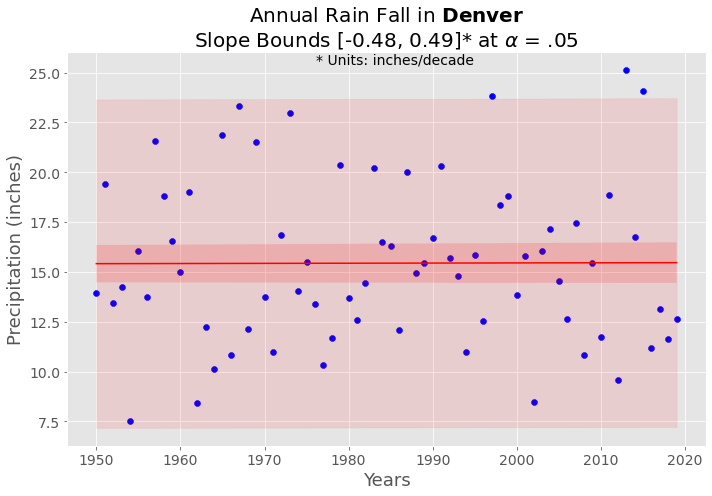

In [151]:
fig, ax = plt.subplots(1, figsize=(10,7))  #[12, 14, 14, 20, 20, 15, 15]

Loc = Location['Denver, CO']
CI = Loc.stats(ax, 'PRCP_sum', 0.05)

# ax.legend(fontsize=15)
# leg = ax.get_legend()
# leg.legendHandles[1].set_color([1, 0, 0, 0.25])

ax.set_ylabel(hp.ylabel_dict['PRCP_sum'], fontsize = 18)
ax.set_xlabel('Years', fontsize = 18)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
ax.set_title(r"""Annual Rain Fall in ${\bfDenver}$
"""             + title_text, fontsize = 20)
ax.text(0.39, 0.97, '* Units: inches/decade', transform=ax.transAxes, fontsize=14)

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.tight_layout()
plt.savefig('Denver_PRCP_annual.png', edgecolor = 'b')

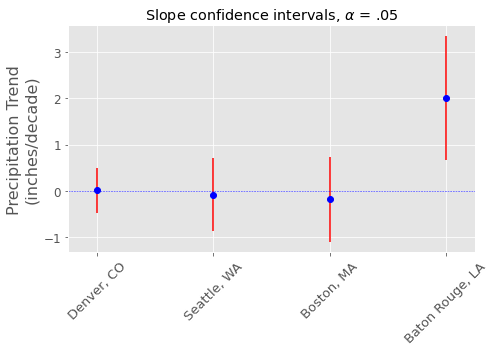

In [120]:
#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'PRCP_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

fig, ax = plt.subplots(1, figsize=(7,5))
X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

ax.errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
ax.set_ylabel('''Precipitation Trend
(inches/decade)''', fontsize = 16)
ax.set_title(r'''Slope confidence intervals, $\alpha$ = .05''')

ax.plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
plt.savefig('Denver_PRCP_annual_CI.png', edgecolor = 'b')

In [192]:
Location['Seattle, WA'].PRCP.data_yr

,Month_id,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,0.25,0.23,0.00,0.04,0.04,0.21,0.28,0.15,0.01,...,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00
1,1,0.01,0.98,0.00,1.36,0.44,0.06,0.88,0.01,0.08,...,0.06,0.00,0.43,0.00,0.16,0.06,0.00,0.00,0.00,0.04
2,1,0.10,0.10,0.24,0.00,0.48,0.00,0.95,0.01,0.00,...,0.03,0.00,0.03,0.16,0.06,0.00,0.02,0.00,0.00,0.78
3,1,0.00,0.17,0.06,0.00,0.79,0.31,0.95,0.00,0.00,...,0.98,0.03,0.80,0.10,0.00,0.40,0.15,0.00,0.13,0.08
4,1,0.08,0.03,0.17,0.00,1.27,0.00,0.34,0.00,0.00,...,0.14,0.12,0.05,0.12,0.00,0.32,0.11,0.00,0.51,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,0.14,0.01,0.00,0.03,0.03,0.13,0.00,0.22,0.31,...,0.44,0.90,0.16,0.01,0.13,0.34,0.05,0.00,0.01,0.01
362,12,0.00,0.22,0.58,0.07,0.31,0.00,0.00,0.59,0.12,...,0.01,0.63,0.00,0.00,0.16,0.06,0.00,0.34,0.43,0.00
363,12,0.06,0.27,0.21,0.00,0.15,0.00,0.00,0.16,0.49,...,0.09,0.29,0.06,0.00,0.00,0.00,0.05,1.50,0.63,0.01
364,12,0.88,0.09,0.13,0.00,0.68,0.00,0.04,0.00,0.00,...,0.00,0.07,0.00,0.01,0.00,0.00,0.02,0.11,0.00,0.04


In [197]:
Y_high  = Location['Denver, CO'].TMAX.data_yr[2019].values
Y_low   = Location['Denver, CO'].TMIN.data_yr[2019].values

0      22.0
1      14.0
2      44.0
3      56.0
4      63.0
       ... 
361    37.0
362    35.0
363    26.0
364    31.0
365    36.0
Name: 2019, Length: 366, dtype: float64

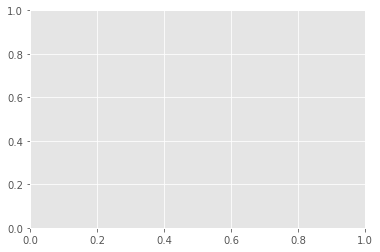

In [199]:
ax = plt.gca()

In [10]:
s = pd.Series(["elk", "pig", "dog", "quetzal"], name="animal")
print(s.to_markdown())
# print(s.to_markdown(tablefmt="grid"))

|    | animal   |
|---:|:---------|
|  0 | elk      |
|  1 | pig      |
|  2 | dog      |
|  3 | quetzal  |
